In [124]:
import matplotlib.pyplot as plt
%matplotlib inline

In [125]:
import numpy as np

def plot_ticks(X=None, width=100000, marker='.',
               color='red', s=20, title=None):
    
    plt.figure(figsize=(10, 1))
    plt.axis([0, width, -1, 1])
    plt.axes().get_yaxis().set_visible(False)
    plt.axhline(0, color='#dddddd', zorder=0)
    plt.xlabel('Word offset')
    
    if title:
        plt.title(title)
    
    if X is not None:
        
        plt.scatter(
            X, np.zeros_like(X),
            marker=marker, color=color, zorder=1, s=s,
        )
    
    plt.show()

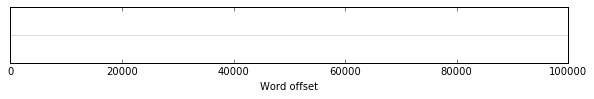

In [73]:
plot_ticks()

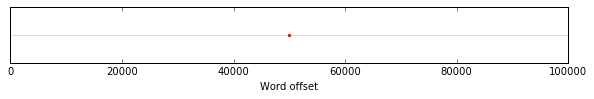

In [74]:
plot_ticks([50000])

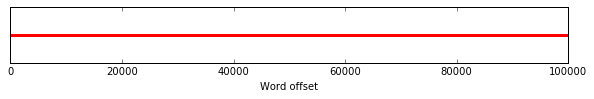

In [61]:
plot_ticks(np.arange(100000), s=10)

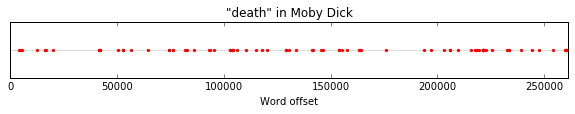

In [126]:
from lint.models import Text

md = (
    Text.query
    .filter(Text.title.like('%Moby-Dick%'))
    .one()
)

md_tokens = md.tokens()

md_death = [
    i for i, token in enumerate(md_tokens)
    if token.token == 'death'
]

plot_ticks(md_death, len(md_tokens), title='"death" in Moby Dick')

In [ ]:
from sqlalchemy.sql.expression import func

texts = Text.query.order_by(func.random()).limit(100)

deaths = {}

for i, text in enumerate(texts):
    
    tokens = text.tokens()
    
    deaths[text.id] = [
        i/len(tokens)
        for i, token in enumerate(tokens)
        if token.token == 'death'
    ]
    
    print(i)

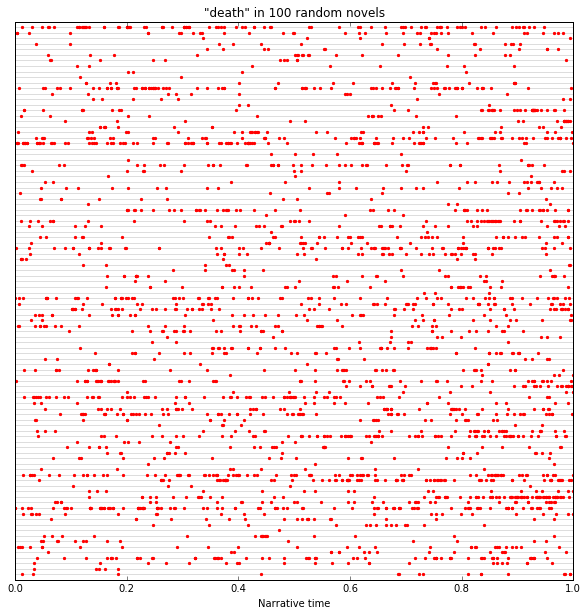

In [77]:
plt.figure(figsize=(10, 10))
plt.axes().get_yaxis().set_visible(False)
plt.axis([0, 1, -1, len(deaths)])
plt.xlabel('Narrative time')

for i, (id, offsets) in enumerate(deaths.items()):
    
    plt.axhline(i, color='#dddddd', zorder=0)
    
    plt.scatter(
        offsets, np.full(len(offsets), i),
        color='red', marker='.'
    )

plt.title('"death" in 100 random novels')
plt.show()

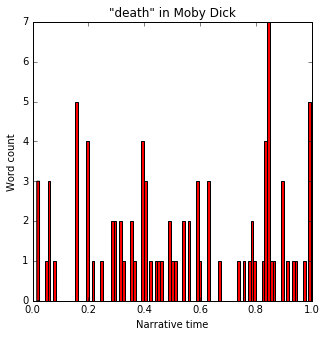

In [127]:
md_death_pct = [
    i/len(md_tokens)
    for i, token in enumerate(md_tokens)
    if token.token == 'death'
]

plt.figure(figsize=(5, 5))

plt.title('"death" in Moby Dick')
plt.xlabel('Narrative time')
plt.ylabel('Word count')
plt.hist(md_death_pct, 100, color='red')
plt.show()

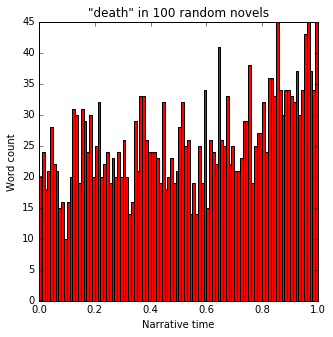

In [129]:
from functools import reduce

combined = reduce(lambda x, y: x+y, deaths.values(), [])

plt.figure(figsize=(5, 5))

plt.title('"death" in 100 random novels')
plt.xlabel('Narrative time')
plt.ylabel('Word count')
plt.hist(combined, 100, color='red')
plt.show()

In [85]:
from lint.models import Bucket

def plot_token(token, w=5, h=5):
    
    series = Bucket.token_series(token)
    
    plt.figure(figsize=(w, h))
    plt.title('"{}" in all novels'.format(token))
    plt.xlabel('Narrative time')
    plt.ylabel('Word count')
    plt.plot(series)

    plt.show()

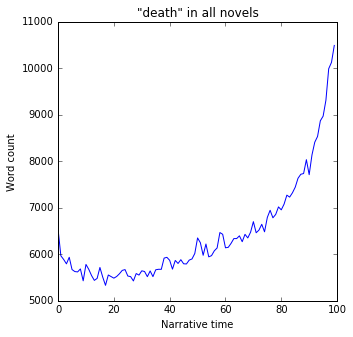

In [86]:
plot_token('death')

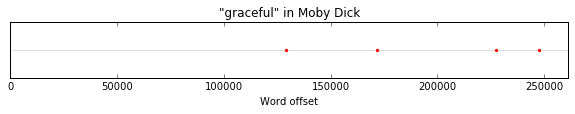

In [121]:
md_blue = [
    i for i, token in enumerate(md_tokens)
    if token.token == 'graceful'
]

plot_ticks(md_blue, len(md_tokens), title='"graceful" in Moby Dick')

In [ ]:
texts = Text.query.order_by(func.random()).limit(10)

blues = {}

for i, text in enumerate(texts):
    
    tokens = text.tokens()
    
    blues[text.id] = [
        i/len(tokens)
        for i, token in enumerate(tokens)
        if token.token == 'graceful'
    ]
    
    print(i)

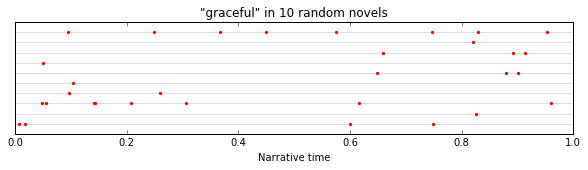

In [123]:
plt.figure(figsize=(10, 2))
plt.axes().get_yaxis().set_visible(False)
plt.axis([0, 1, -1, len(blues)])
plt.xlabel('Narrative time')

for i, (id, offsets) in enumerate(blues.items()):
    
    plt.axhline(i, color='#dddddd', zorder=0)
    
    plt.scatter(
        offsets, np.full(len(offsets), i),
        color='red', marker='.'
    )
    
plt.title('"graceful" in 10 random novels')
plt.show()

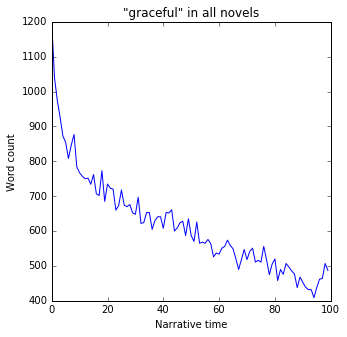

In [119]:
plot_token('graceful')